Comparisons of 
- Abramowitz and Stegun (1970) approximation of $E_1$ with scipy expn(3,x)
- exojax $2 E_3$ with scipy 2*expn(3,x)

author: Hajime Kawahara

last update: March 16th (2021)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expn
from exojax.special.expn import E1
from exojax.spec import rtransfer as rt


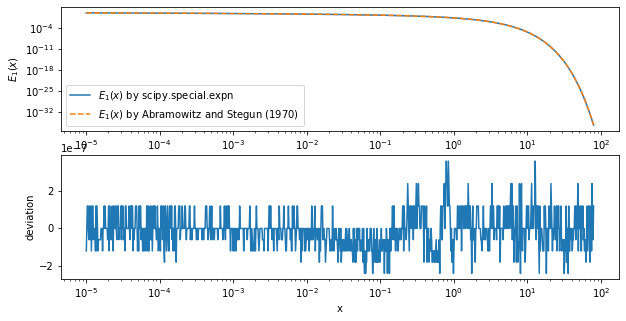

In [4]:
x=jnp.logspace(-5,1.9,1000)
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(211)
plt.plot(x,expn(1,x),label="$E_1(x)$ by scipy.special.expn")
plt.plot(x,E1(x),ls="dashed",label="$E_1(x)$ by Abramowitz and Stegun (1970) ")
plt.ylabel("$E_1(x)$")
plt.yscale("log")
plt.legend()
plt.xscale("log")
ax=fig.add_subplot(212)
plt.plot(x,jexpn.E1(x)/expn(1,x)-1.0)
plt.xscale("log")
plt.ylabel("deviation")
plt.xlabel("x")
plt.savefig("../../documents/figures/E1.pdf", bbox_inches="tight", pad_inches=0.0)
plt.savefig("../../documents/figures/E1.png", bbox_inches="tight", pad_inches=0.0)

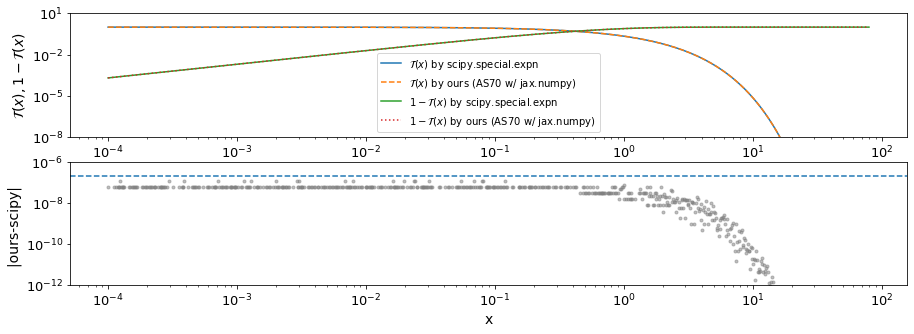

In [3]:
x=np.logspace(-4,1.9,1000)

fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(211)
plt.plot(x,2.0*expn(3,x),label="$\mathcal{T}(x)$ by scipy.special.expn")
plt.plot(x,rt.trans2E3(x),ls="dashed",label="$\mathcal{T}(x)$ by ours (AS70 w/ jax.numpy)")
plt.ylabel("$\mathcal{T}(x)$",fontsize=14)
plt.tick_params(labelsize=13)

plt.plot(x,1-2.0*expn(3,x),label="$1-\mathcal{T}(x)$ by scipy.special.expn")
plt.plot(x,1-rt.trans2E3(x),ls="dotted",label="$1-\mathcal{T}(x)$ by ours (AS70 w/ jax.numpy)")
plt.ylim(1.e-8,1.e1)
plt.ylabel("$\mathcal{T}(x),1-\mathcal{T}(x)$",fontsize=14)
plt.tick_params(labelsize=13)
plt.legend()
plt.xscale("log")
plt.yscale("log")

ax=fig.add_subplot(212)
plt.plot(x,np.abs(rt.trans2E3(x)-(2.0*expn(3,x))),".",alpha=0.5,color="gray")
plt.xscale("log")
plt.yscale("log")
plt.ylabel("|ours-scipy| ",fontsize=14)
plt.xlabel("x",fontsize=14)
plt.ylim(1.e-12,1.e-6)
plt.axhline(2.e-7,ls="dashed")
plt.tick_params(labelsize=13)

plt.savefig("../../documents/figures/E3.pdf", bbox_inches="tight", pad_inches=0.0)
plt.savefig("../../documents/figures/E3.png", bbox_inches="tight", pad_inches=0.0)